In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, Dense

In [2]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

X_train= tf.image.resize(tf.repeat(tf.expand_dims(X_train,axis=-1),3,axis=-1),(32,32))/255
X_test= tf.image.resize(tf.repeat(tf.expand_dims(X_test,axis=-1),3,axis=-1),(32,32))/255

y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model_base=tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
model_base.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model=models.Sequential([
                        model_base,
                        layers.Flatten(),
                        layers.Dense(256, activation='relu'),

                        layers.Dense(10, activation='softmax')])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['accuracy'])
model_de= Sequential()
model_de.add(Flatten(input_shape=(32,32,3)))
model_de.add(Dense(1024, activation="relu"))
model_de.add(Dropout(0.25))
model_de.add(Dense(512,activation="relu"))
model_de.add(Dropout(0.25))
model_de.add(Dense(10, activation='softmax'))

model_de.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
clasic = model_de.fit(X_train, y_train, epochs=5, batch_size=35 ,validation_data=(X_test, y_test))


Epoch 1/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7399 - loss: 0.0364 - val_accuracy: 0.8399 - val_loss: 0.0234
Epoch 2/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8351 - loss: 0.0237 - val_accuracy: 0.8407 - val_loss: 0.0227
Epoch 3/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8534 - loss: 0.0210 - val_accuracy: 0.8511 - val_loss: 0.0214
Epoch 4/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8611 - loss: 0.0202 - val_accuracy: 0.8518 - val_loss: 0.0215
Epoch 5/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.0196 - val_accuracy: 0.8626 - val_loss: 0.0198


In [6]:
trening_model=model.fit(X_train, y_train, epochs=5, batch_size=35 ,validation_data=(X_test, y_test))

Epoch 1/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7479 - loss: 0.0357 - val_accuracy: 0.8254 - val_loss: 0.0246
Epoch 2/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8485 - loss: 0.0219 - val_accuracy: 0.8408 - val_loss: 0.0223
Epoch 3/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8589 - loss: 0.0203 - val_accuracy: 0.8490 - val_loss: 0.0216
Epoch 4/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8699 - loss: 0.0189 - val_accuracy: 0.8596 - val_loss: 0.0200
Epoch 5/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8755 - loss: 0.0182 - val_accuracy: 0.8622 - val_loss: 0.0196


In [7]:
model_base.trainable=True
tune=10

In [8]:
for layer in model_base.layers[:tune]:
    layer.trainable=False

In [9]:
fine_tune=tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=fine_tune, loss='mean_squared_error', metrics=['accuracy'])

In [10]:
history_model=model.fit(X_train, y_train, epochs=5, batch_size=35 ,validation_data=(X_test, y_test))

Epoch 1/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8739 - loss: 0.0183 - val_accuracy: 0.8834 - val_loss: 0.0170
Epoch 2/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.9049 - loss: 0.0140 - val_accuracy: 0.8989 - val_loss: 0.0149
Epoch 3/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9200 - loss: 0.0118 - val_accuracy: 0.8992 - val_loss: 0.0147
Epoch 4/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9317 - loss: 0.0103 - val_accuracy: 0.9077 - val_loss: 0.0136
Epoch 5/5
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9394 - loss: 0.0092 - val_accuracy: 0.9045 - val_loss: 0.0138


To podejście pomimo że powoduje wydłużenie procesu uczania pozwala uzyskać wyszy poziom dokładności. Dzięki mrożeniu warstw i braku aktułalizacji wag udaje się osiągnąć wysoki poziom dokładności który nie jest możliwy przy modelu Dense.

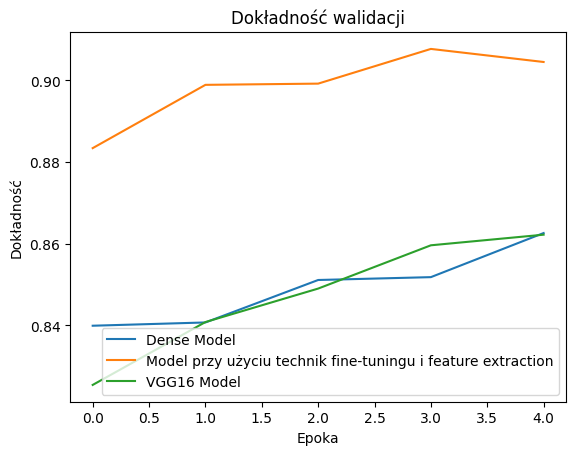

In [11]:
plt.plot(clasic.history['val_accuracy'], label='Dense Model')
plt.plot(history_model.history['val_accuracy'], label='Model przy użyciu technik fine-tuningu i feature extraction')
plt.plot(trening_model.history['val_accuracy'], label='VGG16 Model')
plt.title('Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()
